In [1]:
## import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

### 1. First touch of a data - importing and handling with missing values.

In [2]:
## import data and names files
data = pd.read_csv(r'imports-85_data.csv')
names = pd.read_csv(r'imports-85_names.csv',  sep='_')  ## default separator does not work

In [3]:
data.head(2)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
names.values

array([['2. Source Information:'],
       ['   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)'],
       ['   -- Date: 19 May 1987'],
       ['   -- Sources:'],
       ["     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's"],
       ['        Automotive Yearbook.'],
       ['     2) Personal Auto Manuals, Insurance Services Office, 160 Water'],
       ['        Street, New York, NY 10038 '],
       ['     3) Insurance Collision Report, Insurance Institute for Highway'],
       ['        Safety, Watergate 600, Washington, DC 20037'],
       ['3. Past Usage:'],
       ['   -- Kibler,~D., Aha,~D.~W., \\& Albert,~M. (1989).  Instance-based prediction'],
       ['      of real-valued attributes.  {\\it Computational Intelligence}, {\\it 5},'],
       ['      51--57.'],
       ['\t -- Predicted price of car using all numeric and Boolean attributes'],
       ['\t -- Method: an instance-based learning (IBL) algorithm derived from a'],
       ['\t    lo

In the above we can see that **names** file is rather a description file. We can find here names for columns (as by default there are no headers in data file) and the last 'table' is the information regarding missing values. So that we can import data once again with known header as below.

In [5]:
header_names = ['Symboling', 'Normalized_losses', 'Brand', 'Fuel_type', 'Aspiration', 'Num_of_doors', 'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type', 'Num_of_cylinders', 'Engine_size', 'Fuel_system', 'Bore', 'Stroke', 'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'Price']
data = pd.read_csv(r'imports-85_data.csv', names=header_names)
data.head(3)

,Symboling,Normalized_losses,Brand,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


As we can see in **Normalized_losses** column, missing values are marked by **"?"**  sign. Since it's not very comfortable to me to work with the **names** (description) file, I created own table, that contain all nesseccary informations about N/A's.

In [6]:
def missing_table_creator(data):
    missing_values, number_of_missings, perc_of_missing, type_of_data = [], [], [], []
    m=0   
    for j in range(len(data)):
        for i in range(len(data.columns)):
            if data.values[j, i]=="?":
                missing_values.append(data.columns[i])             
    unique_list = np.unique(list(missing_values))
    for i in unique_list:
        number_of_missings.append(missing_values.count(i))
        perc_of_missing.append(str(np.round(int(number_of_missings[m])/int(len(data)) * 100, 2))+"%")
        m+=1
    for i in unique_list:
        type_of_data.append(type(data[i][0]))
    missings_table = {"Column's name": unique_list, "Number of missings": number_of_missings, "Percent of missings": perc_of_missing, "Type": type_of_data}
    missings_table = pd.DataFrame(missings_table)
    return missings_table

In [7]:
mst = missing_table_creator(data)
mst

,Column's name,Number of missings,Percent of missings,Type
0,Bore,4,1.95%,<class 'str'>
1,Horsepower,2,0.98%,<class 'str'>
2,Normalized_losses,41,20.0%,<class 'str'>
3,Num_of_doors,2,0.98%,<class 'str'>
4,Peak_rpm,2,0.98%,<class 'str'>
5,Price,4,1.95%,<class 'str'>
6,Stroke,4,1.95%,<class 'str'>


One should be careful once looking on the **Type** column. It says, that all listed features have a string type of data, which is not true:

In [8]:
np.unique(list(data.Normalized_losses))

array(['101', '102', '103', '104', '106', '107', '108', '110', '113',
       '115', '118', '119', '121', '122', '125', '128', '129', '134',
       '137', '142', '145', '148', '150', '153', '154', '158', '161',
       '164', '168', '186', '188', '192', '194', '197', '231', '256',
       '65', '74', '77', '78', '81', '83', '85', '87', '89', '90', '91',
       '93', '94', '95', '98', '?'], dtype='<U3')

It means, that probably all values in the dataset are of the string type and have to be converted into ints/floats during processing. There is some theories how to handle with missing values. One says, that in case when the number of N/A's exceeds 55-65% of all observations in a column, and this feature does not seem to be significant, we can concider deleting entire feature. Because of very small number of records (205 rows), I decided not to delete any row/column contains N/A value. For **Normalized_losses** one fifth of values are N/A's. We can reassign (gruop) them into a new value and look, if it's distinguishable on the distribution and scatter plots:

In [9]:
normalized_losses_grouped = data.groupby(by='Normalized_losses').count()
normalized_losses_list = np.unique(normalized_losses_grouped.index)

In [10]:
for i in range(len(normalized_losses_list)):
    if normalized_losses_list[i]=="?":
        normalized_losses_list[i]=400

In [11]:
for i in range(len(normalized_losses_list)):
    normalized_losses_list[i]=int(normalized_losses_list[i])

In [12]:
norm_loss_sort = {"Args": normalized_losses_list, "Values": normalized_losses_grouped.values[:,0]}
norm_loss_sort = pd.DataFrame(norm_loss_sort)
norm_loss_sort = norm_loss_sort.sort_values("Args")

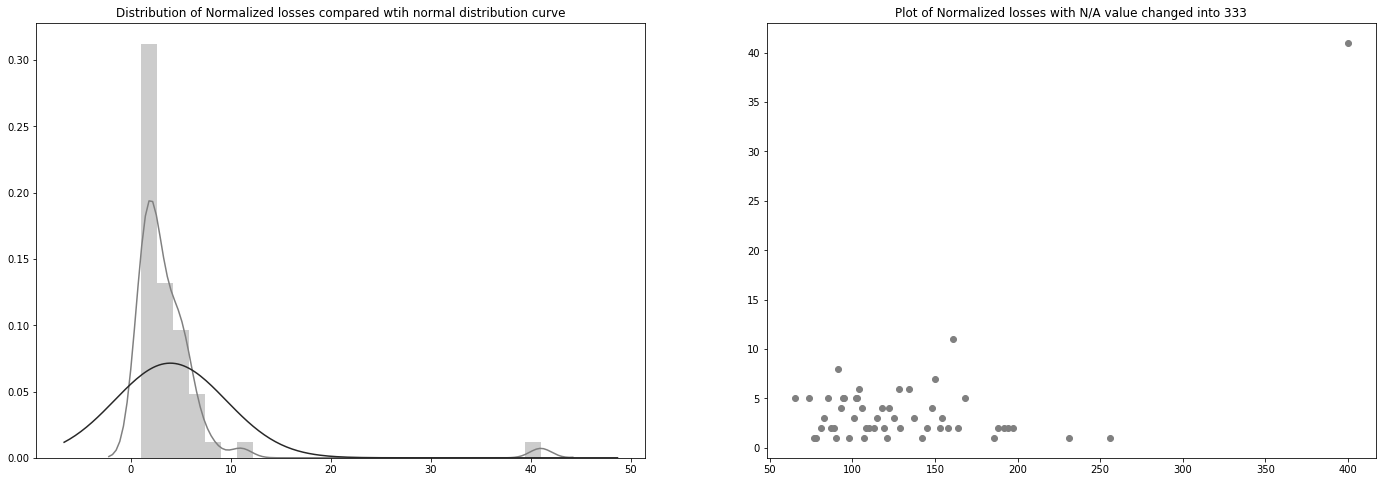

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
ax1.title.set_text("Distribution of Normalized losses compared wtih normal distribution curve")
sns.distplot(normalized_losses_grouped.values[:,0], fit=norm, kde=True, ax=ax1, color='gray')
ax2.title.set_text("Plot of Normalized losses with N/A value changed into 333")
ax2.scatter(norm_loss_sort.values[:,0], norm_loss_sort.values[:,1], color='gray')

As we on both plots, assigned number **400** can be easily distinguish from the rest values, so it can be used in the original file too.

In [14]:
data.Normalized_losses = data.Normalized_losses.replace({"?": 400})

As on the below, we are left with features od percentage leve of N/A's arounf 1-2%. We will go through all particularly.

In [15]:
missing_table_creator(data)

,Column's name,Number of missings,Percent of missings,Type
0,Bore,4,1.95%,<class 'str'>
1,Horsepower,2,0.98%,<class 'str'>
2,Num_of_doors,2,0.98%,<class 'str'>
3,Peak_rpm,2,0.98%,<class 'str'>
4,Price,4,1.95%,<class 'str'>
5,Stroke,4,1.95%,<class 'str'>


In [16]:
## check for type of data
for i in missing_table_creator(data)["Column's name"]:
    print(data[str(i)].head(4))

0    3.47
1    3.47
2    2.68
3    3.19
Name: Bore, dtype: object
0    111
1    111
2    154
3    102
Name: Horsepower, dtype: object
0     two
1     two
2     two
3    four
Name: Num_of_doors, dtype: object
0    5000
1    5000
2    5000
3    5500
Name: Peak_rpm, dtype: object
0    13495
1    16500
2    16500
3    13950
Name: Price, dtype: object
0    2.68
1    2.68
2    3.47
3    3.40
Name: Stroke, dtype: object


Let's start with only non-numerical feture, that is number of doors. What's going, we are looking for unique values, convert into numbers, and after checking that both missing values belong to sedan body style, wlog we can assume, that sedans have four doors.

In [17]:
np.unique(data.Num_of_doors)

array(['?', 'four', 'two'], dtype=object)

In [18]:
data.Num_of_doors = data.Num_of_doors.replace({"four": 1, "two": 0})

In [19]:
data[data.Num_of_doors=="?"]

,Symboling,Normalized_losses,Brand,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,400,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [20]:
## sedans should have 4 doors
data.Num_of_doors = data.Num_of_doors.replace({"?": 1})

In [21]:
missing_table_creator(data)

,Column's name,Number of missings,Percent of missings,Type
0,Bore,4,1.95%,<class 'str'>
1,Horsepower,2,0.98%,<class 'str'>
2,Peak_rpm,2,0.98%,<class 'str'>
3,Price,4,1.95%,<class 'str'>
4,Stroke,4,1.95%,<class 'str'>


In [22]:
bore_mean = np.round(data[data.Bore!="?"].Bore.astype("float32").mean(), 2)
data.Bore = data.Bore.replace({"?": bore_mean})

In [23]:
hpr_mean = np.round(data[data.Horsepower!="?"].Horsepower.astype("float32").mean(), 2)
data.Horsepower = data.Horsepower.replace({"?": hpr_mean})

In [24]:
peak_mean = np.round(data[data.Peak_rpm!="?"].Peak_rpm.astype("float32").mean(), 2)
data.Peak_rpm = data.Peak_rpm.replace({"?": peak_mean})

In [25]:
stroke_mean = np.round(data[data.Stroke!="?"].Stroke.astype("float32").mean(), 2)
data.Stroke = data.Stroke.replace({"?": stroke_mean})

In [26]:
price_mean = np.round(data[data.Price!="?"].Price.astype("float32").mean(), 2)
data.Price = data.Price.replace({"?": price_mean})

All **?** signes are replaced, which can be checked by running the below:

In [27]:
missing_table_creator(data)

,Column's name,Number of missings,Percent of missings,Type


In [28]:
## data without missing values
data.head()

,Symboling,Normalized_losses,Brand,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,400,alfa-romero,gas,std,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,400,alfa-romero,gas,std,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,400,alfa-romero,gas,std,0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,1,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,1,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [29]:
## split data into train and labels sets
train = data.drop(columns='Price')
labels = data.Price

In [30]:
## name of columns for below dictionaries
names.values[50:80]

array([['     ------------------        -----------------------------------------------'],
       ['  1. symboling:                -3, -2, -1, 0, 1, 2, 3.'],
       ['  2. normalized-losses:        continuous from 65 to 256.'],
       ['  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,'],
       ['                               isuzu, jaguar, mazda, mercedes-benz, mercury,'],
       ['                               mitsubishi, nissan, peugot, plymouth, porsche,'],
       ['                               renault, saab, subaru, toyota, volkswagen, volvo'],
       ['  4. fuel-type:                diesel, gas.'],
       ['  5. aspiration:               std, turbo.'],
       ['  6. num-of-doors:             four, two.'],
       ['  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.'],
       ['  8. drive-wheels:             4wd, fwd, rwd.'],
       ['  9. engine-location:          front, rear.'],
       [' 10. wheel-base:               

In [31]:
## dictionaries for categorical features
brand_dict = dict(zip(list(np.unique(data.Brand)), [2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2])) ##brands spltted into three categories: cheap, more expensive and premium
fuel_dict = dict(zip(list(np.unique(data.Fuel_type)), list(range(len(data.groupby(by=['Fuel_type']).count().iloc[:,0])))))
aspiration_dict = dict(zip(list(np.unique(data.Aspiration)), list(range(len(data.groupby(by=['Aspiration']).count().iloc[:,0])))))
body_dict = dict(zip(list(np.unique(data.Body_style)), [3, 1, 0, 2, 3]))
wheels_dict = dict(zip(list(np.unique(data.Drive_wheels)), list(range(len(data.groupby(by=['Drive_wheels']).count().iloc[:,0])))))
engine_loc_dict = dict(zip(list(np.unique(data.Engine_location)), list(range(len(data.groupby(by=['Engine_location']).count().iloc[:,0])))))
engine_type_dict = dict(zip(list(np.unique(data.Engine_type)), list(range(len(data.groupby(by=['Engine_type']).count().iloc[:,0])))))
cylinders_dict = dict(zip(list(np.unique(data.Num_of_cylinders)), [8, 5, 4, 6, 3, 12, 2]))
fuel_system_dict = dict(zip(list(np.unique(data.Fuel_system)), list(range(len(data.groupby(by=['Fuel_system']).count().iloc[:,0])))))

In [32]:
## mapping dictionaries and creating numerical values instead of categoricals
train["brand"] = data.Brand.map(brand_dict)
train["fuel_type"] = data.Fuel_type.map(fuel_dict)
train["aspiration"] = data.Aspiration.map(aspiration_dict)
train["body_style"] = data.Body_style.map(body_dict)
train["drive_wheels"] = data.Drive_wheels.map(wheels_dict)
train["engine_location"] = data.Engine_location.map(engine_loc_dict)
train["engine_type"] = data.Engine_type.map(engine_type_dict)
train["cylinders"] = data.Num_of_cylinders.map(cylinders_dict)
train["fuel_system"] = data.Fuel_system.map(fuel_system_dict)
train = train.drop(columns=['Brand', 'Fuel_type', 'Aspiration', 'Body_style', 'Drive_wheels', 'Engine_location', 'Engine_type', 'Num_of_cylinders', 'Fuel_system'])

## 2. First approach - reducing colinearity and OLS model training.

Once missing values are managed and all categorical features are changed into numerical ones, we can start with looking for correlations between parameters. After checking column's names, it seems we have a lot of useless (dependent) paramters, that have to be deleted. Our goal is to find the most significant parameters that are enough to our prediction task. We can start with running first OLS regression model (to check how it behaves), then look on the correlation's plot.

In [33]:
import statsmodels.api as sm

In [34]:
x = sm.add_constant(train.astype('float64'))
x = np.array(x).astype("float64")
y = np.array(labels).astype("float64")
xnames = list(train.astype('float64').columns)
xnames.insert(0, 'Intercept')
first_model = sm.OLS(y, x)
first_results = first_model.fit()
print(first_results.summary(xname=xnames, yname='Price'))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     57.28
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           4.57e-72
Time:                        22:39:55   Log-Likelihood:                -1904.2
No. Observations:                 205   AIC:                             3860.
Df Residuals:                     179   BIC:                             3947.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.079e+04   1.74e+0

C:\Users\Mikolaj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


First warning is on the bottom of the model summary. Since the condition number is huge, we have too many linearly dependent variables probably. There is no suprise that's happens. One can easily find a realtion between **length** and **width** of a car with its **wheel base, self weight, fuel usage, engine size,** and hence also with **bore and stroke, number of cylinders, horsepower's number**. On the other hand, **fuel type** is strongly correlated with **compression ratio**. **Height** is related with **body style**, which is somehow related with **doors number**. **Fuel usage** in a **city** is colinear with **highway's one**. Since we want to predict the price of a car, we should think what kind of parameters are thought as neccessary when someone wants to measure the price. On the below plot I signed all parameters that show strong colinearity with another ones.

On the above one could observe, we get quite nice $R^2$. However, the set is not splitted on train and test part, so that the model cannot be checked on 'unknown' data. In the below, we can check, how the model behaves, by taking the mean of r^2 after running n-times on randomly splitted data.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
n=int(input("Please enter n: "))
r_sq_mean = []
for i in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    pred = results.predict(x_test)
    r_sq = 1 - sum((pred - y_test)**2) / sum((y_test - y_test.mean())**2)
    r_sq_mean.append(r_sq)
print(np.mean(r_sq_mean))

Please enter n: 100
0.7950541422205579


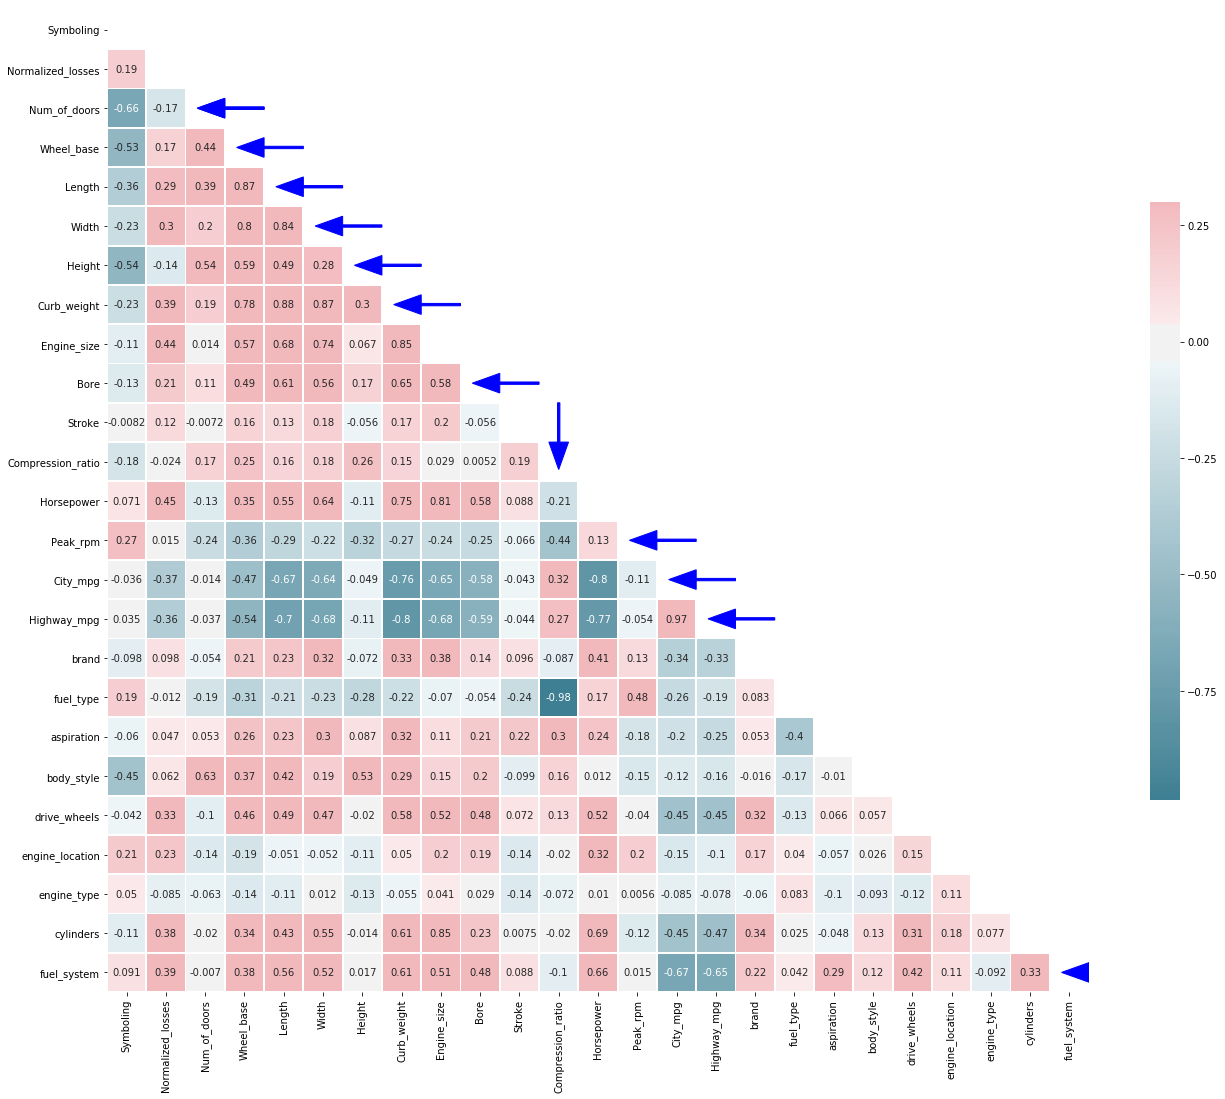

In [37]:
corr = train.astype("float64").corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, cbar=True, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=ax)
ax.arrow(17, 15.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(16, 14.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(15, 13.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(11.5, 10, 0, 1, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(8, 6.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(7, 5.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(6, 4.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(9, 7.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(26, 24.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(11, 9.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(5, 3.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(4, 2.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')
ax.arrow(4, 2.5, -1, 0, head_width=0.5, head_length=0.7, width=.06, fc='b', ec='b')

Let us check, what we are left with and look on the correlation's plot again. It look much better, but still **horsepower** parameter seems to be not neccessary. It's hard to think that this information is not crucial for any car fan, but I think that it can be combine somehow by **engine size** and **aspiration** variables. We can also try to erase the parameter **drive wheel**, which hopefully, can be combine by **body style, engine size** and **location**.

In [38]:
x = sm.add_constant(train.drop(columns=['Num_of_doors', 'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Bore', 'Compression_ratio', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'fuel_system']).astype("float64"))
y = np.array(labels).astype("float64")
xnames = list(train.drop(columns=['Num_of_doors', 'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Bore', 'Compression_ratio', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'fuel_system']).astype("float64").columns)
xnames.insert(0, 'Intercept')
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
second_model = sm.OLS(y, x)
second_results = second_model.fit()
print(second_results.summary(xname=xnames, yname='Price'))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     86.66
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.09e-72
Time:                        22:40:20   Log-Likelihood:                -1931.4
No. Observations:                 205   AIC:                             3891.
Df Residuals:                     191   BIC:                             3937.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           249.6982   3452.03

C:\Users\Mikolaj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


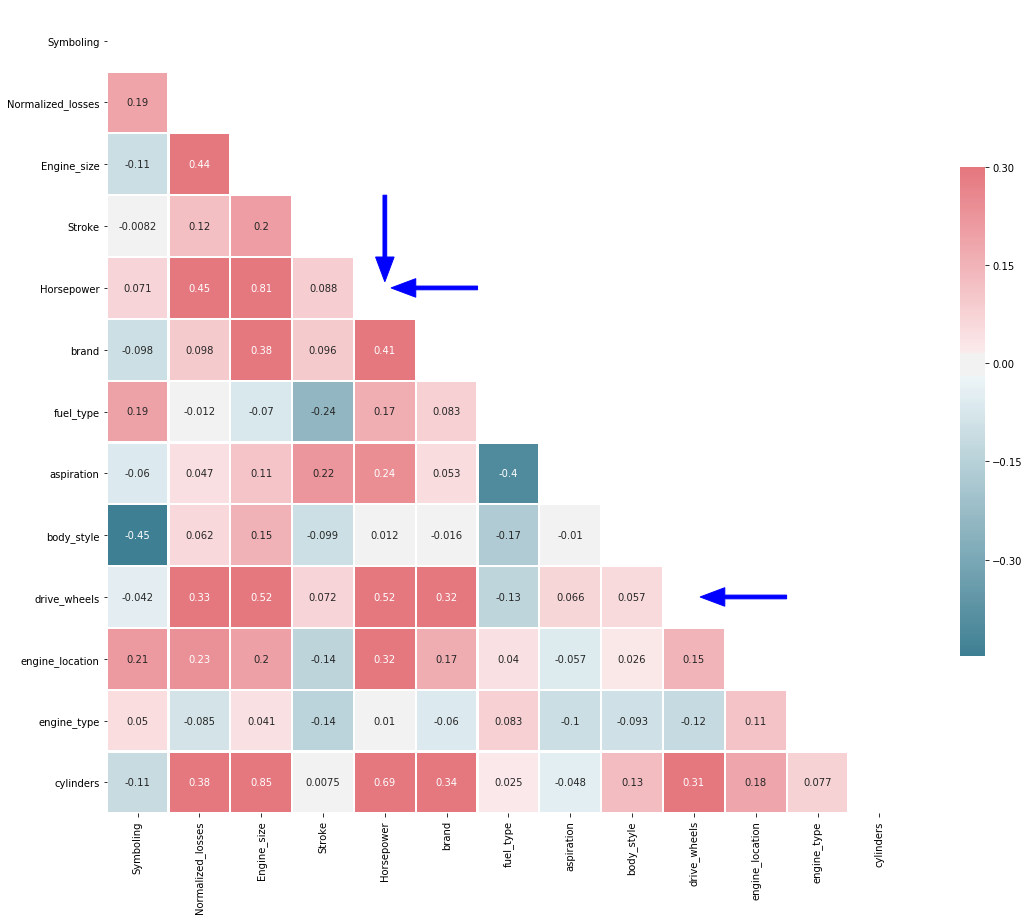

In [39]:
corr = train.drop(columns=['Num_of_doors', 'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Bore', 'Compression_ratio', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'fuel_system']).astype("float64").corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, cbar=True, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1.2, cbar_kws={"shrink": .5}, ax=ax)

ax.arrow(6, 4.5, -1, 0, head_width=0.3, head_length=0.4, width=.06, fc='b', ec='b')
ax.arrow(4.5, 3, 0, 1, head_width=0.3, head_length=0.4, width=.06, fc='b', ec='b')
ax.arrow(11, 9.5, -1, 0, head_width=0.3, head_length=0.4, width=.06, fc='b', ec='b')

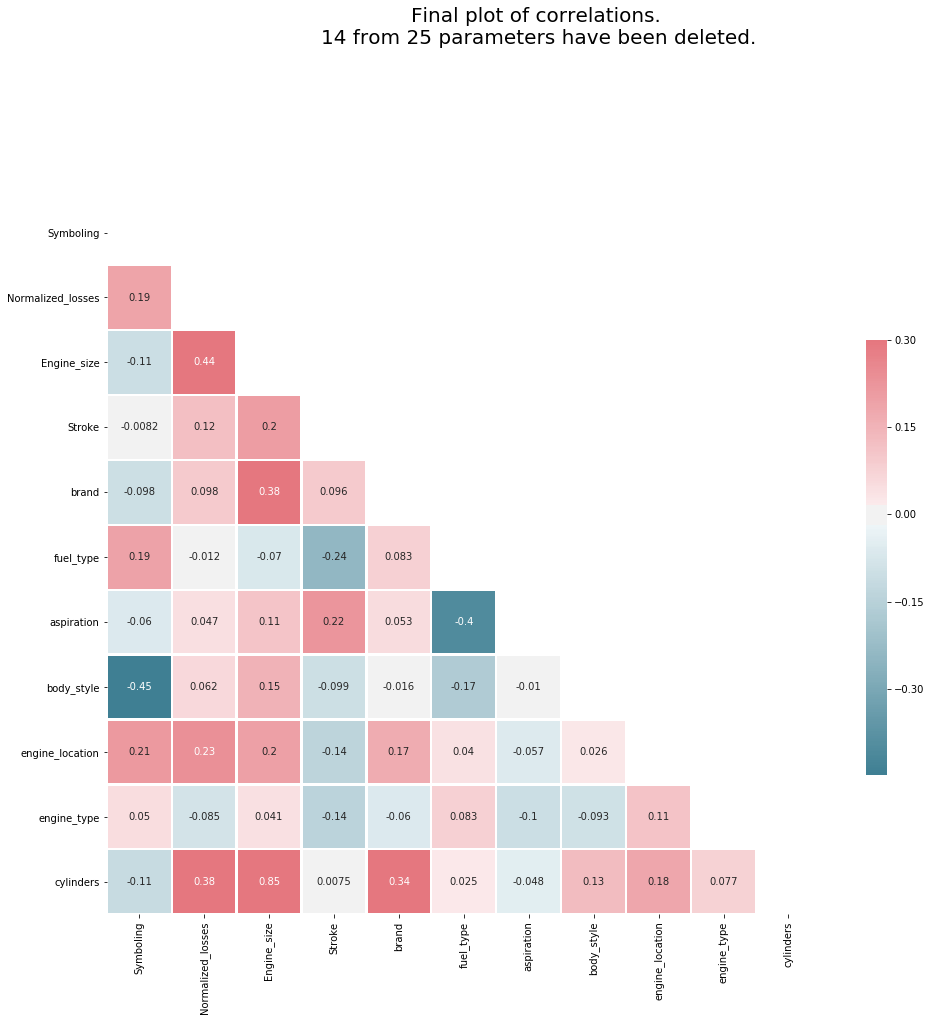

In [40]:
corr = train.drop(columns=['drive_wheels', 'Horsepower', 'Num_of_doors', 'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Bore', 'Compression_ratio', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'fuel_system']).astype("float64").corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(16, 16))
f.suptitle("Final plot of correlations. \n14 from 25 parameters have been deleted.", fontsize=20)
sns.heatmap(corr, cbar=True, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1.2, cbar_kws={"shrink": .5}, ax=ax)

In [41]:
train_after_del = train.drop(columns=['drive_wheels', 'Horsepower', 'Num_of_doors', 'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Bore', 'Compression_ratio', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'fuel_system']).astype("float64")

In [42]:
x = sm.add_constant(train_after_del)
y = np.array(labels).astype("float64")
xnames = list(train_after_del.columns)
xnames.insert(0, 'Intercept')
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
third_model = sm.OLS(y, x)
third_results = third_model.fit()
print(third_results.summary(xname=xnames, yname='Price'))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     98.88
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           4.36e-73
Time:                        22:40:33   Log-Likelihood:                -1935.4
No. Observations:                 205   AIC:                             3895.
Df Residuals:                     193   BIC:                             3935.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3532.4878   3224.61

In [43]:
print("Despite we have deleted many features, the condition number is still too big:", np.linalg.cond(third_results.model.exog))

Despite we have deleted many features, the condition number is still too big: 3711.0709461531637


The reason may follows from the fact that values are not standarized yet, so that the model gets too big numbers at the beginning. We standarize parameters: **normalized losses, engine size, stroke, symboling, body style, brand** and **cylinders**. Let us see that no dummy update is needed, since all numerical variables are binary or already have required order.

In [44]:
train_after_del.head()

,Symboling,Normalized_losses,Engine_size,Stroke,brand,fuel_type,aspiration,body_style,engine_location,engine_type,cylinders
0,3.0,400.0,130.0,2.68,2.0,1.0,0.0,3.0,0.0,0.0,4.0
1,3.0,400.0,130.0,2.68,2.0,1.0,0.0,3.0,0.0,0.0,4.0
2,1.0,400.0,152.0,3.47,2.0,1.0,0.0,0.0,0.0,5.0,6.0
3,2.0,164.0,109.0,3.40,2.0,1.0,0.0,2.0,0.0,3.0,4.0
4,2.0,164.0,136.0,3.40,2.0,1.0,0.0,2.0,0.0,3.0,5.0


In [45]:
## standarization for normalized losses column
norm_loss_std = (train_after_del.Normalized_losses - train_after_del.Normalized_losses.mean())/train_after_del.Normalized_losses.std()
train_after_del['Normalized_losses'] = train_after_del['Normalized_losses'].map(dict(zip(list(train_after_del.Normalized_losses), norm_loss_std)))
## standarization for engine size column
engine_size_std = (train_after_del.Engine_size - train_after_del.Engine_size.mean())/train_after_del.Engine_size.std()
train_after_del['Engine_size'] = train_after_del['Engine_size'].map(dict(zip(list(train_after_del.Engine_size), engine_size_std)))
## standarization for stroke column
stroke_std = (train_after_del.Stroke - train_after_del.Stroke.mean())/train_after_del.Stroke.std()
train_after_del['Stroke'] = train_after_del['Stroke'].map(dict(zip(list(train_after_del.Stroke), stroke_std)))
## standarization for cylinders column
cylinders_std = (train_after_del.cylinders - train_after_del.cylinders.mean())/train_after_del.cylinders.std()
train_after_del['cylinders'] = train_after_del['cylinders'].map(dict(zip(list(train_after_del.cylinders), cylinders_std)))
## standarization for symboling column
symboling_std = (train_after_del.Symboling - train_after_del.Symboling.mean())/train_after_del.Symboling.std()
train_after_del['Symboling'] = train_after_del['Symboling'].map(dict(zip(list(train_after_del.Symboling), symboling_std)))
## standarization for body style column
body_std = (train_after_del.body_style - train_after_del.body_style.mean())/train_after_del.body_style.std()
train_after_del['body_style'] = train_after_del['body_style'].map(dict(zip(list(train_after_del.body_style), body_std)))
## standarization for brand column
brand_std = (train_after_del.brand - train_after_del.brand.mean())/train_after_del.brand.std()
train_after_del['brand'] = train_after_del['brand'].map(dict(zip(list(train_after_del.brand), brand_std)))

In [46]:
train_after_del.head()

,Symboling,Normalized_losses,Engine_size,Stroke,brand,fuel_type,aspiration,body_style,engine_location,engine_type,cylinders
0,1.739213,1.919115,0.074267,-1.835193,1.38422,1.0,0.0,1.412614,0.0,0.0,-0.352025
1,1.739213,1.919115,0.074267,-1.835193,1.38422,1.0,0.0,1.412614,0.0,0.0,-0.352025
2,0.133183,1.919115,0.602571,0.683959,1.38422,1.0,0.0,-1.285391,0.0,5.0,1.498364
3,0.936198,-0.117356,-0.430023,0.460743,1.38422,1.0,0.0,0.513279,0.0,3.0,-0.352025
4,0.936198,-0.117356,0.218350,0.460743,1.38422,1.0,0.0,0.513279,0.0,3.0,0.573169


In [47]:
x = sm.add_constant(train_after_del)
y = np.array(labels).astype("float64")
xnames = list(train_after_del.columns)
xnames.insert(0, 'Intercept')
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
fourth_model = sm.OLS(y, x)
fourth_results = fourth_model.fit()
print(fourth_results.summary(xname=xnames, yname='Price'))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     98.88
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           4.36e-73
Time:                        22:40:43   Log-Likelihood:                -1935.4
No. Observations:                 205   AIC:                             3895.
Df Residuals:                     193   BIC:                             3935.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.274e+04   1067.96

In [48]:
print("After standarizing we obtain the condition number:", np.round(np.linalg.cond(fourth_results.model.exog), 4), "and there is no warning regarding this parameter anymore.")

After standarizing we obtain the condition number: 31.7761 and there is no warning regarding this parameter anymore.


## 3. Second approach - selecting features due to p-value. 

Before checking if assumptions of the linear regression model are satisfied, we can try another approach with selecting parameters that should be used. We can look once again on the first model, and check **p-values** for each variable. Assuming $\alpha=0.05$ we can say that all parameters with $\text{p-value}>\alpha$ are statistically not neccessary and try delete them.

In [49]:
xnames = list(train.astype('float64').columns)
xnames.insert(0, 'Intercept')
alpha = 0.05
first_model_pv = {"Features": xnames, "p-value": np.round(first_results.pvalues, 6)} ## take features with p-values from the first model
first_model_pv = pd.DataFrame(first_model_pv) ## convert into df type
cols_to_delete = first_model_pv[first_model_pv["p-value"]>alpha] ## take exceeding p-values only
cols_to_delete

,Features,p-value
0,Intercept,0.078522
1,Symboling,0.116915
3,Num_of_doors,0.772369
4,Wheel_base,0.296227
5,Length,0.707837
6,Width,0.075814
7,Height,0.283309
8,Curb_weight,0.423298
12,Compression_ratio,0.894647
13,Horsepower,0.777895


In [50]:
## dropping all above features
train_cols_del_pv = train.drop(columns=list(cols_to_delete.Features)[1:]).astype('float64')
train_cols_del_pv.head()

,Normalized_losses,Engine_size,Bore,Stroke,Peak_rpm,brand,body_style,drive_wheels,engine_location,engine_type,cylinders
0,400.0,130.0,3.47,2.68,5000.0,2.0,3.0,2.0,0.0,0.0,4.0
1,400.0,130.0,3.47,2.68,5000.0,2.0,3.0,2.0,0.0,0.0,4.0
2,400.0,152.0,2.68,3.47,5000.0,2.0,0.0,2.0,0.0,5.0,6.0
3,164.0,109.0,3.19,3.40,5500.0,2.0,2.0,1.0,0.0,3.0,4.0
4,164.0,136.0,3.19,3.40,5500.0,2.0,2.0,0.0,0.0,3.0,5.0


In [51]:
## standarization for normalized losses column
norm_loss_std = (train_cols_del_pv.Normalized_losses - train_cols_del_pv.Normalized_losses.mean())/train_cols_del_pv.Normalized_losses.std()
train_cols_del_pv['Normalized_losses'] = train_cols_del_pv['Normalized_losses'].map(dict(zip(list(train_cols_del_pv.Normalized_losses), norm_loss_std)))
## standarization for engine size column
engine_size_std = (train_cols_del_pv.Engine_size - train_cols_del_pv.Engine_size.mean())/train_cols_del_pv.Engine_size.std()
train_cols_del_pv['Engine_size'] = train_cols_del_pv['Engine_size'].map(dict(zip(list(train_cols_del_pv.Engine_size), engine_size_std)))
## standarization for stroke column
bore_std = (train_cols_del_pv.Bore - train_cols_del_pv.Bore.mean())/train_cols_del_pv.Bore.std()
train_cols_del_pv['Bore'] = train_cols_del_pv['Bore'].map(dict(zip(list(train_cols_del_pv.Bore), bore_std)))
## standarization for cylinders column
cylinders_std = (train_cols_del_pv.cylinders - train_cols_del_pv.cylinders.mean())/train_cols_del_pv.cylinders.std()
train_cols_del_pv['cylinders'] = train_cols_del_pv['cylinders'].map(dict(zip(list(train_cols_del_pv.cylinders), cylinders_std)))
## standarization for symboling column
peak_std = (train_cols_del_pv.Peak_rpm - train_cols_del_pv.Peak_rpm.mean())/train_cols_del_pv.Peak_rpm.std()
train_cols_del_pv['Peak_rpm'] = train_cols_del_pv['Peak_rpm'].map(dict(zip(list(train_cols_del_pv.Peak_rpm), peak_std)))
## standarization for body style column
body_std = (train_cols_del_pv.body_style - train_cols_del_pv.body_style.mean())/train_cols_del_pv.body_style.std()
train_cols_del_pv['body_style'] = train_cols_del_pv['body_style'].map(dict(zip(list(train_cols_del_pv.body_style), body_std)))
## standarization for brand column
brand_std = (train_cols_del_pv.brand - train_cols_del_pv.brand.mean())/train_cols_del_pv.brand.std()
train_cols_del_pv['brand'] = train_cols_del_pv['brand'].map(dict(zip(list(train_cols_del_pv.brand), brand_std)))

In [52]:
x = sm.add_constant(train_cols_del_pv)
x = np.array(x).astype("float64")
y = np.array(labels).astype("float64")
xnames = list(train.drop(columns=list(cols_to_delete.Features)[1:]).columns)
xnames.insert(0, 'Intercept')
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model_due_to_pv = sm.OLS(y, x)
results_due_to_pv = model_due_to_pv.fit()
print(results_due_to_pv.summary(xname=xnames, yname='Price'))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     102.9
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.70e-74
Time:                        22:41:03   Log-Likelihood:                -1931.9
No. Observations:                 205   AIC:                             3888.
Df Residuals:                     193   BIC:                             3928.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           2.19e+04   3282.65

After standarization and running model on new data, we can check, if the left variables are colinear or not. What is interesting, from the correlation plot, it seems that features in new data are more linearly dependent than previously (condition number is higher in the second model). Moreover in both models there are 11 features left. However, $R^2$ score is a bit higher in the new model, $0.854$ vs. $0.849$. 

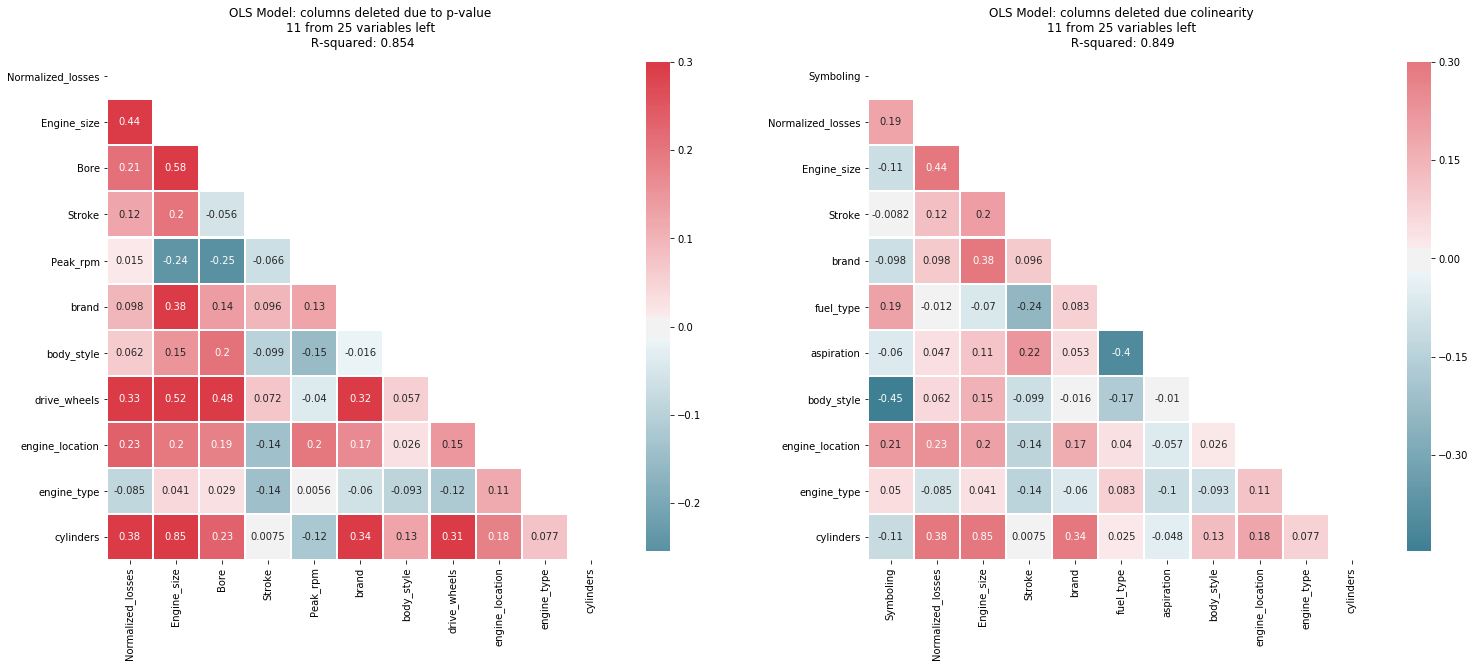

In [53]:
corr1 = train_cols_del_pv.corr()
mask1 = np.zeros_like(corr1, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True

corr2 = train_after_del.corr()
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 18))
sns.heatmap(corr1, cbar=True, annot=True, mask=mask1, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1.2, cbar_kws={"shrink": .5}, ax=ax1)
ax1.title.set_text("OLS Model: columns deleted due to p-value\n11 from 25 variables left\n R-squared: 0.854")
sns.heatmap(corr2, cbar=True, annot=True, mask=mask1, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1.2, cbar_kws={"shrink": .5}, ax=ax2)
ax2.title.set_text("OLS Model: columns deleted due colinearity\n11 from 25 variables left\n R-squared: 0.849")

To decide which data should we work with, we can run the below. It takes two datasets separately, splits both into train and test sets, fits the models on train data, predicts values on x_test and finally compares them with y_test (it counts R-squared for each epoch/model). Results are printed and kept in **global_mean** list. Finally we compute how often the model trained on the first data (newer) is better than the second one - trained on the data from the first approach.

In [63]:
n=int(input("Please enter n: \n"))
x1 = sm.add_constant(train_cols_del_pv)
x1 = np.array(x1).astype("float64")
x2 = sm.add_constant(train_after_del)
x2 = np.array(x2).astype("float64")
y = np.array(labels).astype("float64")
global_mean = [[], []]
for j in range(n):
    r_sq_mean = [[],[]]
    for i in range(500):
        x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2)
        x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2)
        model1 = sm.OLS(y1_train, x1_train)
        model2 = sm.OLS(y2_train, x2_train)
        results1 = model1.fit()
        results2 = model2.fit()
        pred1 = results1.predict(x1_test)
        pred2 = results2.predict(x2_test)
        r_sq1 = 1 - sum((pred1 - y1_test)**2) / sum((y1_test - y1_test.mean())**2)
        r_sq2 = 1 - sum((pred2 - y2_test)**2) / sum((y2_test - y2_test.mean())**2)
        r_sq_mean[0].append(r_sq1)
        r_sq_mean[1].append(r_sq2)
    if j%4==0:
        print("Epoch", j+1, "- R-sqared for variables selected due to p-value:", np.round(np.mean(r_sq_mean[0]), 5), "- R-squared for variables selected due to colinearity:", np.round(np.mean(r_sq_mean[1]), 5))
    global_mean[0].append(np.round(np.mean(r_sq_mean[0])-np.mean(r_sq_mean[1]), 5))
for i in range(len(global_mean[0])):
    if global_mean[0][i]>=0:
        global_mean[1].append(1)
    else:
        global_mean[1].append(0)
global_mean = np.array(global_mean)
print("\nModel with variables selected due to p-value was better in", np.round(np.sum(global_mean[1])/n * 100, 2), "% during", n, "epochs.")
print("\nAvearge difference between two r-square parameters is", np.round(np.mean(global_mean[0]), 5))

Please enter n: 
60
Epoch 1 - R-sqared for variables selected due to p-value: 0.80503 - R-squared for variables selected due to colinearity: 0.79898
Epoch 5 - R-sqared for variables selected due to p-value: 0.7978 - R-squared for variables selected due to colinearity: 0.79739
Epoch 9 - R-sqared for variables selected due to p-value: 0.8068 - R-squared for variables selected due to colinearity: 0.79786
Epoch 13 - R-sqared for variables selected due to p-value: 0.80548 - R-squared for variables selected due to colinearity: 0.79471
Epoch 17 - R-sqared for variables selected due to p-value: 0.79972 - R-squared for variables selected due to colinearity: 0.79861
Epoch 21 - R-sqared for variables selected due to p-value: 0.80045 - R-squared for variables selected due to colinearity: 0.7962
Epoch 25 - R-sqared for variables selected due to p-value: 0.80301 - R-squared for variables selected due to colinearity: 0.79722
Epoch 29 - R-sqared for variables selected due to p-value: 0.80102 - R-squar

Almost each time, once the above has been runnuning, new data were giving better $R^2$ value. On the other hand, the average difference between both cases is around $0.005$, so for rounding up to 2 digits after a coma, we would yield the mean difference equal to $0.01$. However, deeper looking into another model's parameters, makes the first approach a bit better in my opinion. Details will be provided below, once we are checking, if assumptions, that guarantee OLS regression model is working properly, are satisfied.

## 4. Checking assumptions for OLS Regression Model. 

1. The error term has a population mean of zero.

It simply 
means, we want to check if a vector of residues has a mean equal to zero. We want to avoid the case, once the model under- or overpredicts values.

In [93]:
print("Error term for the first approach:" ,np.round(fourth_results.resid.mean(), 10))
print("Error term for the second approach:" ,np.round(results_due_to_pv.resid.mean(), 10))

Error term for the first approach: 0.0
Error term for the second approach: -0.0


The minus sign in the second case, means that without rounding this model underpredicts values, but it happens at most on $10^{-11}$ level.

2. The error term is normally distributed.

We use five tests to check that assumption: Kolmogorov-Smirnov, Shapiro–Wilk, Anderson–Darling, Jarque–Bera and  Lilliefors.

In [ ]:
from statsmodels.stats.diagnostic import normal_ad, lilliefors
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import shapiro, kstest

In [109]:
anderson_darling_test1 = normal_ad(fourth_results.resid)
shapiro_wilk_test1 = shapiro(fourth_results.resid)
lilliefors_test1 = lilliefors(fourth_results.resid)
kolmogorov_smirnov_test1 = kstest(fourth_results.resid, 'norm')
jarque_bera_test1 = jarque_bera(fourth_results.resid)[:2]

arr1 = np.array(anderson_darling_test1+shapiro_wilk_test1+lilliefors_test1+kolmogorov_smirnov_test1+jarque_bera_test1).reshape(5,2)
residual_results_table1 = {"Test statistic": arr1[:,0], "P-value": np.round(arr1[:,1], 6)}
residual_results_df1 = pd.DataFrame(residual_results_table1, index=["Anderson-Darlin", "Shapiro-Wilk", "Lilliefors", "Kolmogorov-Smirnov", "Jarque-Bera"])
residual_results_df1

,Test statistic,P-value
Anderson-Darlin,1.168714,0.004619
Shapiro-Wilk,0.976279,0.001533
Lilliefors,0.075759,0.006119
Kolmogorov-Smirnov,0.502439,0.000000
Jarque-Bera,32.808155,0.000000


Taking $\alpha=0.05$ (or even $\alpha=0.01$), p-values for all tests (especially for Shapiro-Wilk which is known as most precise) are smaller than $\alpha$, so there is an evidence to reject $H_0$ hypothesis, which says, that error term is normally distributed. Furthermore, we can look on the **Q-Q plot**, that compares two sets of quantiles against one another. On the below, the closer points look like a straight line, the closer is the error term to be normally distributed. Both approaches are shown in the below, one can see that in the first case, points cover the red line a bit better and more symetric (please take a look on Y-axis in both cases).

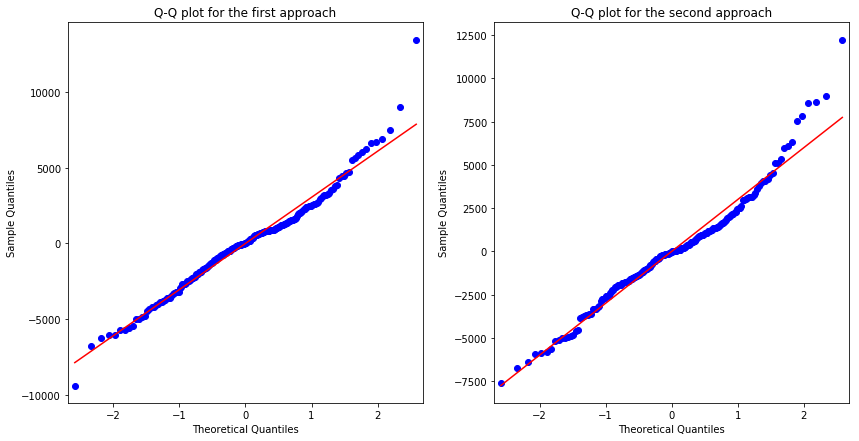

In [123]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
res1 = fourth_results.resid
res2 = results_due_to_pv.resid
sm.qqplot(res1, line='s', ax=ax1)
ax1.title.set_text("Q-Q plot for the first approach")
sm.qqplot(res2, line='s', ax=ax2)
ax2.title.set_text("Q-Q plot for the second approach")
plt.show()

The Q-Q plot has explanation once looking on the below table (for the second approach). We can see that in this case, p-values are even smaller in each test, so it means the first approach 'is closer' to have the error term normally distributed.

In [189]:
anderson_darling_test2 = normal_ad(results_due_to_pv.resid)
shapiro_wilk_test2 = shapiro(results_due_to_pv.resid)
lilliefors_test2 = lilliefors(results_due_to_pv.resid)
kolmogorov_smirnov_test2 = kstest(results_due_to_pv.resid, 'norm')
jarque_bera_test2 = jarque_bera(results_due_to_pv.resid)[:2]

arr2 = np.array(anderson_darling_test2+shapiro_wilk_test2+lilliefors_test2+kolmogorov_smirnov_test2+jarque_bera_test2).reshape(5,2)
residual_results_table2 = {"Test statistic": arr2[:,0], "P-value": np.round(arr2[:,1], 6)}
residual_results_df2 = pd.DataFrame(residual_results_table2, index=["Anderson-Darlin", "Shapiro-Wilk", "Lilliefors", "Kolmogorov-Smirnov", "Jarque-Bera"])
residual_results_df2

,Test statistic,P-value
Anderson-Darlin,1.725061,0.000196
Shapiro-Wilk,0.968078,0.000134
Lilliefors,0.079448,0.003117
Kolmogorov-Smirnov,0.502439,0.000000
Jarque-Bera,34.242454,0.000000


3. The error term has a constant variance - homoscedasticity.

The variance of the errors should be consistent for all observations. In other words, the variance does not change for each observation or for a range of observations.

In [289]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.diagnostic import het_white

In [313]:
x = sm.add_constant(train_after_del)
x = np.array(x).astype("float64")
y = np.array(labels).astype("float64")
homo_breusche_pagan = het_breuschpagan(fourth_results.resid, x)
homo_goldfeld_quandt = het_goldfeldquandt(y, x, alternative='two-sided')
homo_white = het_white(fourth_results.resid, x)

In [314]:
arr3 = np.array(homo_breusche_pagan[:2]+homo_goldfeld_quandt[:2]+homo_white[:2]).reshape(3,2)
homo_results_table = {"Test statistic": arr3[:,0], "P-value": np.round(arr3[:,1], 6)}
homo_results_df = pd.DataFrame(homo_results_table, index=["Breusche-Pagan", "Goldfeld-Quandt", "White"])
homo_results_df

,Test statistic,P-value
Breusche-Pagan,34.104972,0.000348
Goldfeld-Quandt,0.496973,0.000991
White,99.125144,0.004098


Based on p-values for all three tests, we can reject the $H_0$ hypothesis, which says that there is homoscedasticity. It can be verifed also by looking on the below plots. On the left one, we can see that errors are unstable and not symetric with any horizontal line. On the right one, we can observe how predictions fit the actual prices.

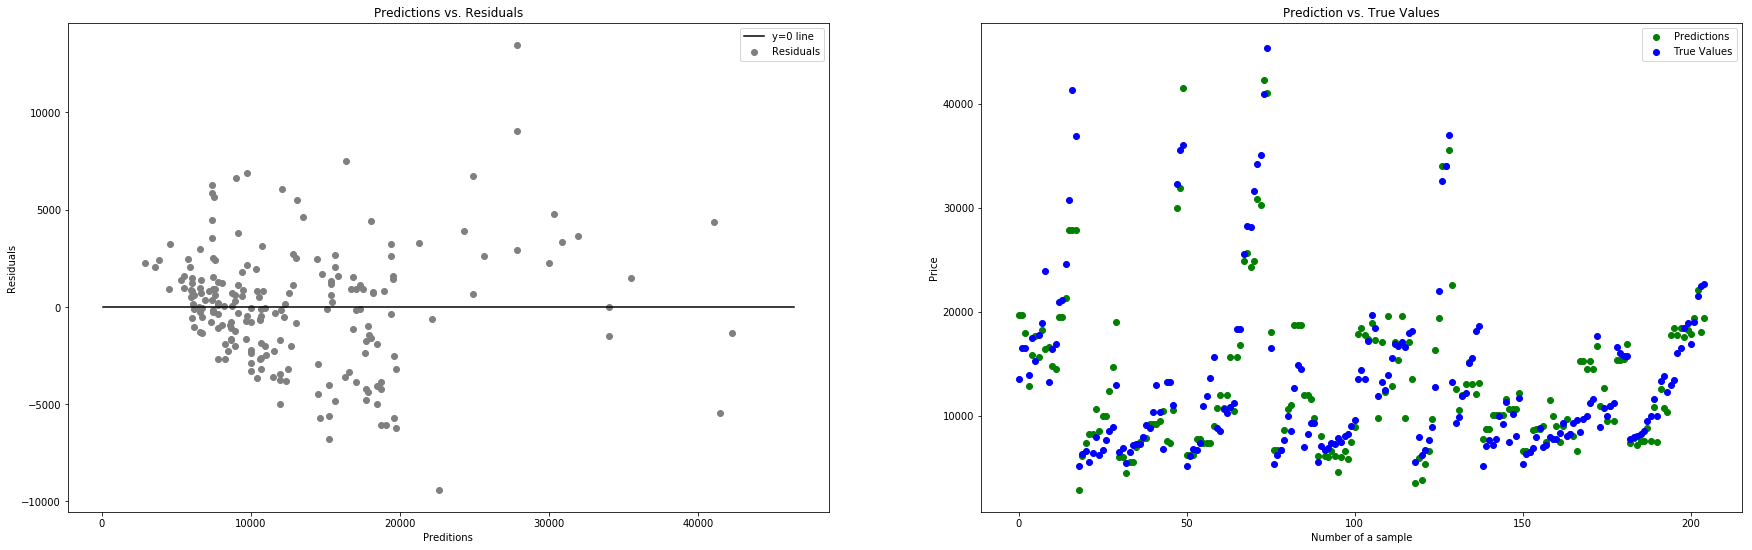

In [362]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
ax1.scatter(fourth_results.predict(x), fourth_results.resid, c='gray', label='Residuals')
ax1.plot(np.linspace(50, 46450, 1000), np.zeros(1000), c='black', label="y=0 line")
ax1.title.set_text("Predictions vs. Residuals")
ax1.legend()
ax1.set_xlabel("Preditions")
ax1.set_ylabel("Residuals")
ax2.scatter(range(len(fourth_results.resid)), fourth_results.predict(x), c='g', label='Predictions')
ax2.scatter(range(len(fourth_results.resid)), y, c='b', label='True Values')
ax2.title.set_text("Prediction vs. True Values")
ax2.set_xlabel("Number of a sample")
ax2.set_ylabel("Price")
ax2.legend()

Once the homoscedasticity has to be rejected, one can try use WLS model (Weighted Least Squares) instead of OLS (Ordinary Least Squares) one. It has different assumptions to satisfy, I will try to test it on this dataset in the future. Anyway, now we are going to check next point.

4. Autocorrelation of error terms.

Observations of the error term should be uncorrelated with each other. In other words, one observation of the error term should not predict the next observation. For instance, if the error for one observation is positive and that systematically increases the probability that the following error is positive, that is a positive correlation. If the subsequent error is more likely to have the opposite sign, that is a negative correlation. This problem is known autocorrelation. We use two tests to verify the $H_0$ hypothesis, that there is no correlation betweeen error terms.

In [379]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, acorr_ljungbox

In [174]:
durbin_watson_test = durbin_watson(fourth_results.resid)
breusch_godfrey_test = acorr_breusch_godfrey(fourth_results)[:2]
ljung_box_test = acorr_ljungbox(fourth_results.resid, boxpierce=True, lags=1)

In [155]:
dw_df = {"Test statistic": durbin_watson_test}
dw_df = pd.DataFrame(dw_df, index=["Durbin-Watson test"])
dw_df

,Test statistic
Durbin-Watson test,1.11171


For Durbin-Watson test we use a significance table (https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf). For $\alpha=0.05$ and population around 200, the boundaries are following:
$\\ \text{dL} = 1.665, \ \text{dU} = 1.874 $. Since the test statistic is equal to $1.112$, there is statistical evidence that the error terms are positively autocorrelated.

In [156]:
bg_df = {"Test statistic": breusch_godfrey_test[0], "p-values": breusch_godfrey_test[1]}
bg_df = pd.DataFrame(bg_df, index=["Breusch–Godfrey test"])
bg_df

,Test statistic,p-values
Breusch–Godfrey test,51.685422,0.000003


In [188]:
arr4 = np.array(ljung_box_test).reshape(2,2)

lj_df = {"Test statistic": arr4[:,0], "p-value": np.round(arr4[:,1], 8)}
lj_df = pd.DataFrame(lj_df, index=["Ljung-Box test", "Box-Pierce test"])
lj_df

,Test statistic,p-value
Ljung-Box test,38.687396,0.0
Box-Pierce test,38.126709,0.0


Breusch-Godfrey, Ljung-Box and Box-Pierce tests also show that there is correlation between the error term. It can follows from the fact, that there are independent variable missing from the model. The positive autocorrelation increases the variance of the coefficient estimates and estimated standard errors given by ordinary least squares will be smaller than the true values. It can make the crucial parameters like t-statistic, F-statistic, R-squared and adjusted R-squared inaccurate. These symptoms can be fatal for any model, so like in the previous assumption. Either model should be changed or we are facing problematic data.

So far one could observe, that most of assumptions are not satisfied or, at least, partially not satisfied. So that, one could ask, if it is a good idea to run linear regression model on this data. In other words, one wants to check if the data has linear structure. To satisfy this assumption, the correctly specified model must just fit the linear pattern.

5. Linear structure - model is linear in the coefficients and the error term.

Obviously, in general, especially in real projects, this assumption should be checked as the first one. Without linearity in data, it's hardly possible to get accurate and true results on the output. However, my goal here is showing and analysing methods for checking all these assumptions, and in my opinion, it's still interesting (from the learning's point of view, not the best predition's one), to look what can happen once some assumption is not satisfied, why that occurs and so on. Going back for the linear structre, again we use statistical tests to verify that.

In [411]:
from statsmodels.stats.diagnostic import linear_rainbow, linear_harvey_collier

31.776141336839597

In [406]:
rainbow = linear_rainbow(fourth_results)
rainbow_df = {"Test statistic": rainbow[0], "p-value": rainbow[1]}
rainbow_df = pd.DataFrame(rainbow_df, index=["Rainbow test"])
rainbow_df

,Test statistic,p-value
Rainbow test,1.281008,0.114873


Roughly speaking, the Rainbow test is checking if some good linear fit can be achieved on a subsample in the "middle" of the data, even if the true relationship is non-linear. The $H_0$ hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample. For alpha equal to 0.01, 0.05 or even 0.1, p-value is still greater, so there is no reason to reject the hypothesis regarding the linearity.

In [403]:
harvey_collier = linear_harvey_collier(fourth_results)

LinAlgError: Singular matrix

6. Multicollinearity.

The above error arises due to the perfect correlation in data. It means, that there still can be a problem with multicollinearity. We can check that by Variance Inflation Factor test, as in the below:

In [424]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [453]:
multicoll = [variance_inflation_factor(np.array(train_after_del), i) for i in range(train_after_del.shape[1])]
multicoll_df = {"Results": multicoll}
multicoll_df = pd.DataFrame(multicoll_df, index=train_after_del.columns)
multicoll_df

,Results
Symboling,1.493219
Normalized_losses,1.419056
Engine_size,4.743736
Stroke,1.262785
brand,1.268014
fuel_type,5.947967
aspiration,1.313865
body_style,1.358396
engine_location,1.237089
engine_type,6.371251


In [461]:
print("The interpretation is the following: for Engine size variable we have the variance inflation factor equal to", multicoll_df.Results[2], "taking the square root, we get, that this means that the standard error for the coefficient of that predictor variable is", np.round(np.sqrt(multicoll_df.Results[2]), 3), "times larger than if that predictor variable had 0 correlation with the other predictor variables." )

The interpretation is the following: for Engine size variable we have the variance inflation factor equal to 4.743735945723864 taking the square root, we get, that this means that the standard error for the coefficient of that predictor variable is 2.178 times larger than if that predictor variable had 0 correlation with the other predictor variables.


The results of the Variance Inflation Factor test are not perfect, but they are the best we have obtained. On the below we can check reults, once testing the dataset before selecting best features.

In [465]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

multicoll2 = [variance_inflation_factor(np.array(train.astype('float64')), i) for i in range(train.shape[1])]
multicoll_df_ = {"All variables": multicoll2}
multicoll_df_ = pd.DataFrame(multicoll_df_, index=train.columns)
multicoll_df_

,All variables
Symboling,4.605486
Normalized_losses,5.499112
Num_of_doors,7.094925
Wheel_base,3071.141371
Length,2413.012450
Width,5678.416062
Height,1310.099240
Curb_weight,481.797657
Engine_size,312.966588
Bore,664.366135


The global parameters, that describes multicollinearity is the condition number and it can be found in the OLS model summary. We can verify three values of it:

In [468]:
cond_num = {"1st Approach": np.linalg.cond(fourth_results.model.exog), "2nd Approach": np.linalg.cond(results_due_to_pv.model.exog), "All variables": np.linalg.cond(first_results.model.exog)}
cond_num = pd.DataFrame(cond_num, index=["Condition Number"])
cond_num

,1st Approach,2nd Approach,All variables
Condition Number,31.776141,77.183163,524078.699406


Next tool which can be helpful graphical visualiation of data. On the below we can see (literally), how each feature fits with price variable. On each plot, there is the fitted line, calculated by the model.

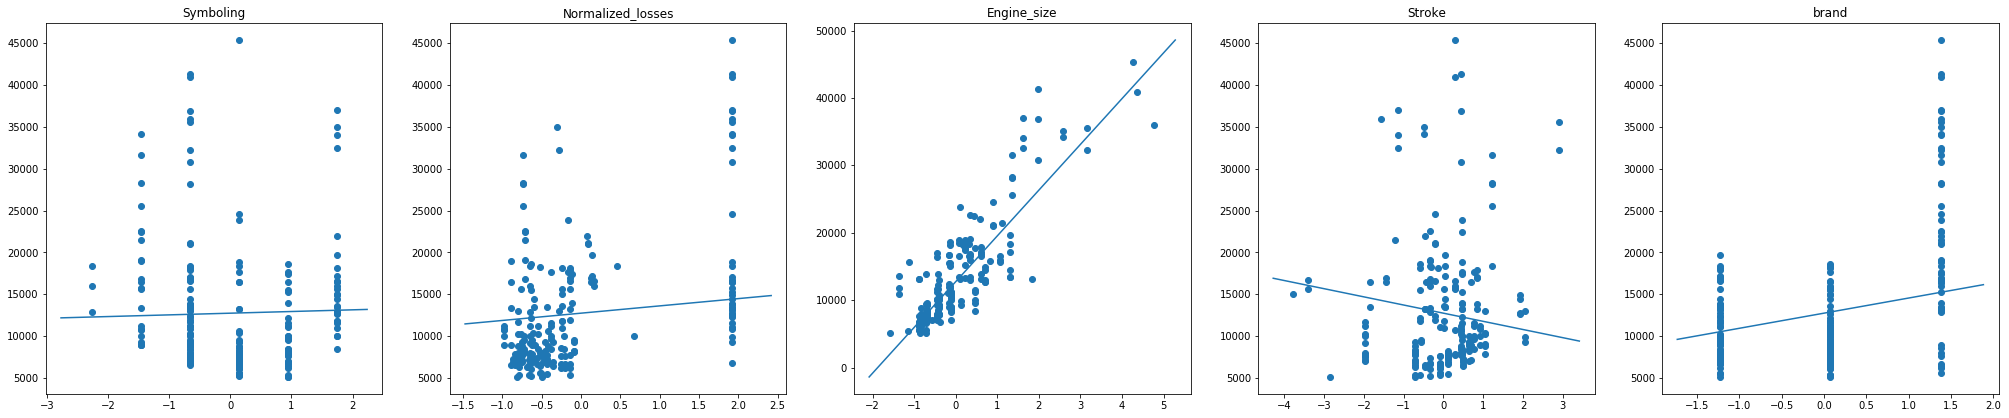

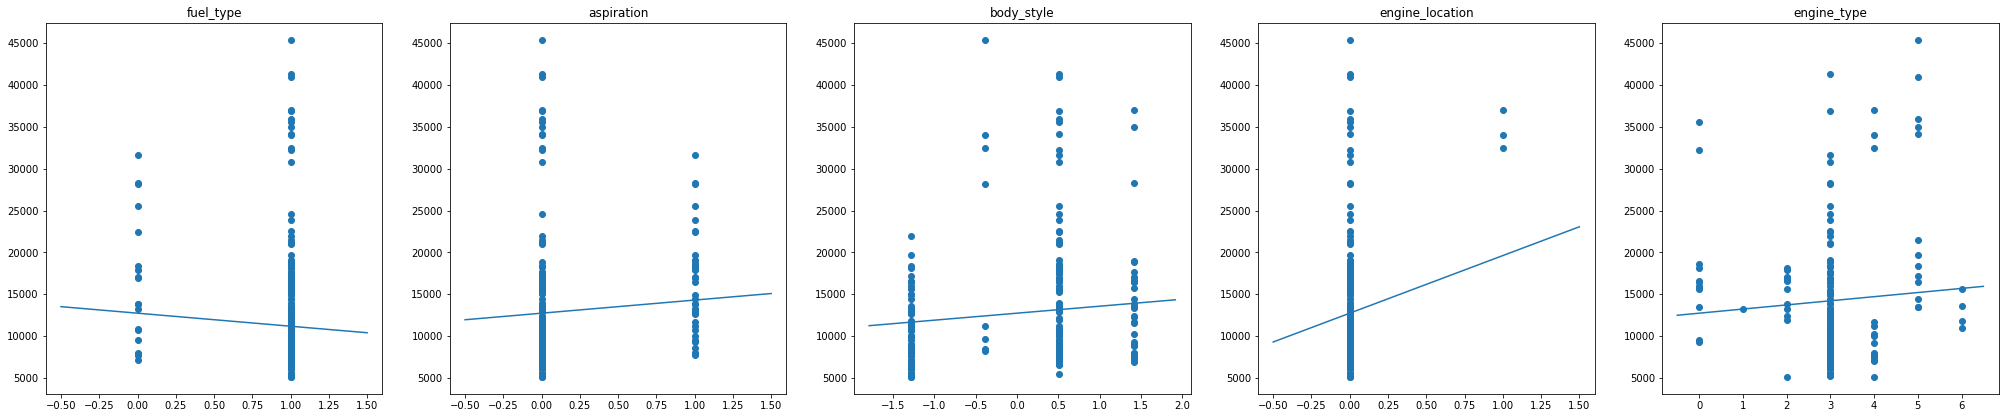

In [487]:
n=251
plt.figure(figsize=(35,15))

for i in train_after_del.columns:
    plt.subplot(n)
    n = n + 1
    x = train_after_del[str(i)]
    x = np.array(x)
    y = labels.astype('float64')
    z = np.linspace(np.min(x)-0.5, np.max(x)+0.5, 1000)
    line = fourth_results.params[0] + z*fourth_results.params[str(i)]
    plt.scatter(x, y)
    plt.plot(z, line)
    plt.title(str(i))
    if n>255:
        break
plt.show()

n=251
plt.figure(figsize=(35,15))

for i in train_after_del.columns[5:]:
    plt.subplot(n)
    n = n + 1
    x = train_after_del[str(i)]
    x = np.array(x)
    y = labels.astype('float64')
    z = np.linspace(np.min(x)-0.5, np.max(x)+0.5, 1000)
    line = fourth_results.params[0] + z*fourth_results.params[str(i)]
    plt.scatter(x, y)
    plt.plot(z, line)
    plt.title(str(i))
    if n>255:
        break
plt.show()

## 5. Final observations and parameters.

As we can see above, there are only three continuous variables left, which is not lucky case for linear regression model. Most of continuous features have been deleted due to very strong collinearity with another variables. Anyway, as we can see on the below, predicted prices are not as bad as one could assume they should be, especially after whole analysis. On the middle plot we can see, only few records have quite high laverage value, the rest is centered which means the number of outliers is quite small. On the right plot, we measure Cook's distance - observations with high value of this measure should be considered deeper in the analysis. To get precise values of Cook's distance (and another paramters listed below) we can use OLS Influence library.

In [590]:
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance

Three greatest values of Cook's distance: [-461.266 -224.307 -143.806  -94.104  -67.079  -17.661   43.93   217.754
  340.862  359.402  374.747 1001.669 1418.65 ]


C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


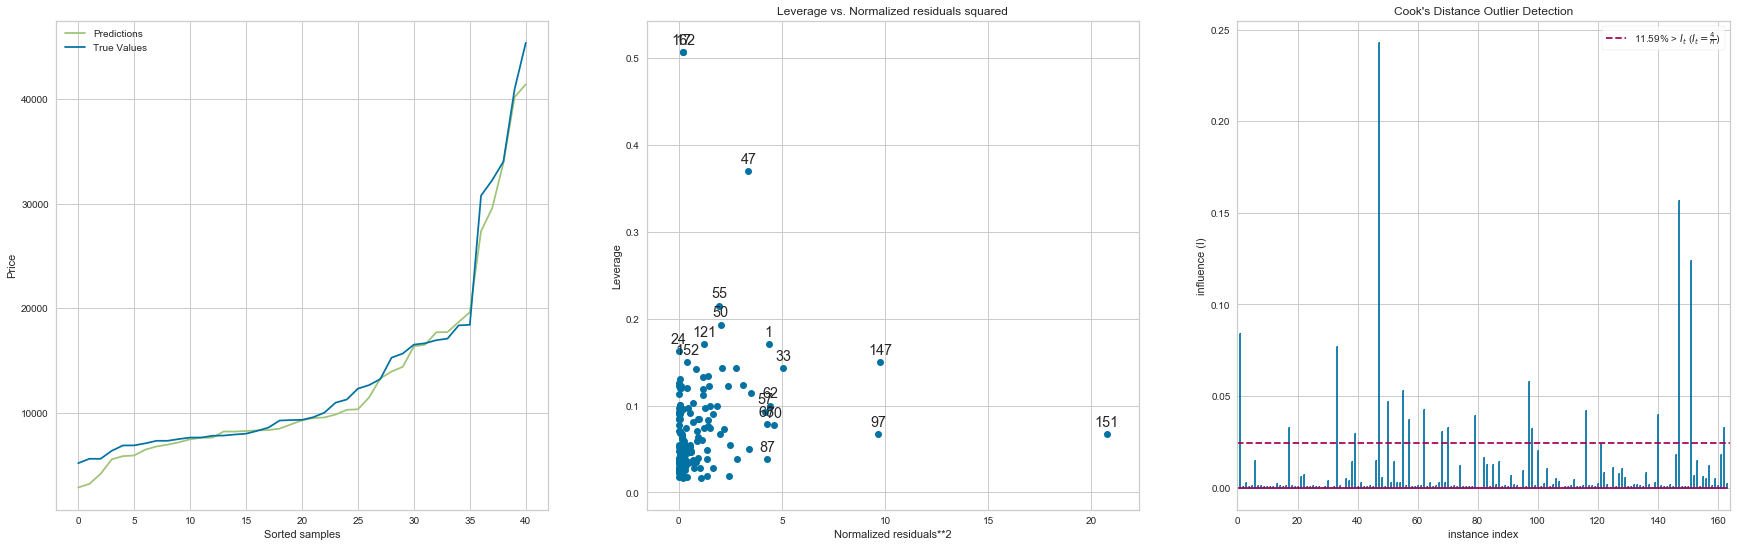

Final linear function is following:
The final formula for the fitted line is:

 12805.0 * const  +  323.0 * Symboling  +  774.0 * Normalized_losses  +  6423.0 * Engine_size  +  -953.0 * Stroke  +  1971.0 * brand  +  -1690.0 * fuel_type  +  2260.0 * aspiration  +  966.0 * body_style  +  7036.0 * engine_location  +  424.0 * engine_type  +  -1179.0 * cylinders

Test R-square: 0.8949791919987219

Condition number: 34.01130335846418 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     65.74
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           4.66e-52
Time:                        17:07:28   Log-Likelihood:                -1549.1
No. Observations:                 164   AIC:                             3122.
Df Residuals:

In [618]:
x = sm.add_constant(train_after_del)
x_arr = np.array(x).astype("float64")
y = np.array(labels).astype("float64")
list_=[]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 9))

x_train, x_test, y_train, y_test = train_test_split(x_arr, y, test_size=0.2)
final_model = sm.OLS(y_train, x_train)
xnames = list(train_after_del.astype('float64').columns)
xnames.insert(0, 'Intercept')
final_results = final_model.fit(xname=xnames, yname='Price')
ols_inf = OLSInfluence(final_results)
pred = final_results.predict(x_test)
r_sq = 1 - sum((pred - y_test)**2) / sum((y_test - y_test.mean())**2)
ax1.plot(range(len(pred)), np.sort(pred), c='g', label='Predictions')
ax1.plot(range(len(pred)), np.sort(y_test), c='b', label='True Values')
ax1.set_xlabel("Sorted samples")
ax1.set_ylabel("Price")
ax1.legend()
plot_leverage_resid2(final_results, ax=ax2)

visualizer = CooksDistance()
visualizer.fit(x_train, y_train)
visualizer.show(ax=ax3)

print("Final linear function is following:")
for i in range(len(final_results.params)):
    list_.append(str(np.round(final_results.params[i])) + " * " + str(x.columns[i]))
print('The final formula for the fitted line is:\n\n', '  +  '.join([lst for lst in list_]))
print("\nTest R-square:", r_sq)
print("\nCondition number:", np.linalg.cond(final_results.model.exog), '\n')
print(final_results.summary())
print("\nIn the below one can find another parameters that can be found in OLS Influence summary table:\n")
print(ols_inf.summary_table())

## Conclusion.

As we see, there is some conditions the data has to satisfy, to make linear regression model validate, and make our considerations accurate. From the above, we can see that OLS linear regression model is probably not the best one to choose. Based on that result, we could check how another regression models would work here (starting with Weigthed Least Squares (WLS) Regression Model). Anyway, each model has different assumpitions that dataset should satisfy, so once we are facing noised data with high linear corelations, many categorical features, small number of records and so on, preparing data and finding appropriate model can be not trivial task. Anyway, I hope that some considerations written here will be helpful somehow for you.